In [29]:
# Import the required libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import joblib


In [22]:
# Load the data
file = 'C:/Users/fabio/Downloads/PMLL/data_cleaned.xlsx'
data = pd.read_excel(file, sheet_name='Sheet1')
data

,Name,SMILES,AATS0e,AATS0i,AATS0m,AATS0p,AATS0v,AATS1i,AATS1p,AATS2i,...,nHBint4,nHCsatu,nHeavyAtom,nN,nO,naAromAtom,naasC,ndO,nsssCH,nssssC
0,Isopentenyl diphosphate,CC(=C)CCOP(=O)(O)OP(=O)(O)O,8.632177,168.118613,170.924509,1.928311,199.956898,149.465706,1.896449,163.561478,...,9,2,14,0,7,0,0,2,0,0
1,Geranyl diphosphate,CC(=CCCC(=CCOP(=O)(O)OP(=O)(O)O)C)C,8.099664,166.266588,132.653496,1.734295,193.977790,147.252495,1.849055,160.211742,...,9,6,19,0,7,0,0,2,0,0
2,Farnesyl diphosphate,CC(=CCCC(=CCCC(=CCOP(=O)(O)OP(=O)(O)O)C)C)C,7.833408,165.340576,113.517990,1.637286,190.988236,146.167588,1.825822,158.311356,...,9,9,24,0,7,0,0,2,0,0
3,Geranylgeranyl diphosphate,CC(=CCCC(=CCCC(=CCCC(=CCOP(=O)(O)OP(=O)(O)O)C)...,7.673654,164.784968,102.036686,1.579081,189.194504,145.523424,1.812028,157.218215,...,9,12,29,0,7,0,0,2,0,0
4,Phytyl diphosphate,CC(C)CCCC(C)CCCC(C)CCCC(=CCOP(=O)(O)OP(=O)(O)O)C,7.592933,166.486322,93.499732,1.483211,175.833031,146.174778,1.752158,157.383583,...,9,3,29,0,7,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,"2,2,4-Trihydroxybutyric acid",OCCC(O)(O)C(O)=O,8.862844,171.398534,109.707353,1.054619,177.923026,156.270438,1.353541,158.772957,...,4,0,9,0,5,0,0,1,0,1
487,3-Hydroxypropionic acid,OCCC(O)=O,8.582290,170.520236,100.566063,1.080332,175.518792,154.225222,1.374503,161.027051,...,3,1,6,0,3,0,0,1,0,0
488,6-hydroxyhexanal,OCCCCCC=O,7.628405,167.534027,69.485675,1.167758,167.344395,147.904776,1.547733,157.542827,...,0,1,8,0,2,0,0,1,0,0
489,Ambrettolic acid,OCCCCCCCC\C=C\CCCCCC(O)=O,7.393007,165.971288,63.400242,1.222253,170.570512,146.244692,1.627090,154.716438,...,0,3,19,0,3,0,0,1,0,0


In [23]:
#Drop unncessary columns
to_drop =['Name','SMILES']
data = data[data.columns.difference(to_drop)]
data.head()

,AATS0e,AATS0i,AATS0m,AATS0p,AATS0v,AATS1i,AATS1p,AATS2i,AATS2m,AATS4e,...,nHBint4,nHCsatu,nHeavyAtom,nN,nO,naAromAtom,naasC,ndO,nsssCH,nssssC
0,8.632177,168.118613,170.924509,1.928311,199.956898,149.465706,1.896449,163.561478,132.620226,8.499238,...,9,2,14,0,7,0,0,2,0,0
1,8.099664,166.266588,132.653496,1.734295,193.977790,147.252495,1.849055,160.211742,99.298391,7.910597,...,9,6,19,0,7,0,0,2,0,0
2,7.833408,165.340576,113.517990,1.637286,190.988236,146.167588,1.825822,158.311356,84.072501,7.654280,...,9,9,24,0,7,0,0,2,0,0
3,7.673654,164.784968,102.036686,1.579081,189.194504,145.523424,1.812028,157.218215,75.314246,7.515567,...,9,12,29,0,7,0,0,2,0,0
4,7.592933,166.486322,93.499732,1.483211,175.833031,146.174778,1.752158,157.383583,66.375300,7.376479,...,9,3,29,0,7,0,0,2,3,0


In [24]:
#separate entrance data and labels
X = data.drop(['Bioactive'], axis = 1)
y = data['Bioactive']

In [25]:
#create the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(343, 249) (343,)
(148, 249) (148,)


In [26]:
#create the models
models =[]
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
models.append(rf)
svm=LinearSVC(C=0.0001)
models.append(svm)
lr=LogisticRegression(max_iter=1000)
models.append(lr)
bys = GaussianNB()
models.append(bys)
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
models.append(knn)
dt = DecisionTreeClassifier()
models.append(dt)
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,
                     max_features=1.0,n_estimators=10)
models.append(bg)
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),
                         n_estimators=10,learning_rate=0.6)
models.append(adb)
evc=VotingClassifier(estimators=[('lr',lr),('knn', knn)],voting='soft')
models.append(evc)

In [35]:
#Train and save the models
filenames = ['rf.sav', 'svm.sav', 'lr.sav', 'bys.sav', 'knn.sav', 'dt.sav', 'bg.sav', 
             'adb.sav', 'evc.sav']
trained_mod = []
index = 0
for model in models: 
    model.fit(X_train, y_train)
    trained_mod.append(model)
    name = filenames[index]
    joblib.dump(model, name)
    index += 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://s

In [38]:
#calculate the performance metrics for all the models
Accuracy_Train  = []
Accuracy_Test  = []
Precision = []
Recall = []
AUC = []
for model in trained_mod:
    
    y_pred = model.predict(X_test)
    
    accuracy_train = model.score(X_train, y_train)
    Accuracy_Train.append(accuracy_train)
    
    accuracy_test = model.score(X_test, y_test)
    Accuracy_Test.append(accuracy_test)
    
    precision = precision_score(y_test, y_pred)
    Precision.append(precision)
    
    recall = recall_score(y_test, y_pred)
    Recall.append(recall)
    
    auc = roc_auc_score(y_test, y_pred)
    AUC.append(auc)

In [39]:
#create a dataframe with the performance metrics
performance_metrics = pd.DataFrame( {'Model': models,'Accuracy Train': Accuracy_Train,
                                     'Accuracy Test': Accuracy_Test, 'Precision ': Precision, 
                                    'Recall': Recall, 'AUC': AUC})
performance_metrics

,Model,Accuracy Train,Accuracy Test,Precision,Recall,AUC
0,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.988338,0.837838,0.761194,0.864407,0.842316
1,LinearSVC(C=0.0001),0.705539,0.716216,0.660377,0.593220,0.695487
2,LogisticRegression(max_iter=1000),0.755102,0.662162,0.552941,0.796610,0.684822
3,GaussianNB(),0.530612,0.439189,0.413043,0.966102,0.527995
4,"KNeighborsClassifier(algorithm='brute', n_jobs...",0.819242,0.777027,0.709677,0.745763,0.771758
5,DecisionTreeClassifier(),0.991254,0.763514,0.681818,0.762712,0.763378
6,(DecisionTreeClassifier(random_state=144634998...,0.909621,0.804054,0.720588,0.830508,0.808513
7,"(DecisionTreeClassifier(max_depth=4, min_sampl...",0.991254,0.817568,0.728571,0.864407,0.825462
8,"VotingClassifier(estimators=[('lr', LogisticRe...",0.804665,0.729730,0.630137,0.779661,0.738145


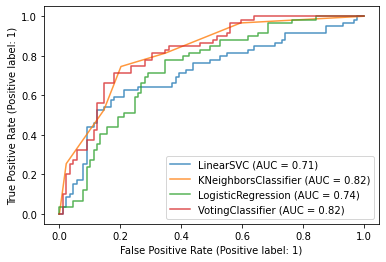

In [40]:
#Plot the ROC curve for the models without overfitting
ax = plt.gca()
rfc_disp = plot_roc_curve(svm, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(lr, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(evc, X_test, y_test, ax=ax, alpha=0.8)
plt.savefig("AUC.jpg", dpi=2000)
plt.show()


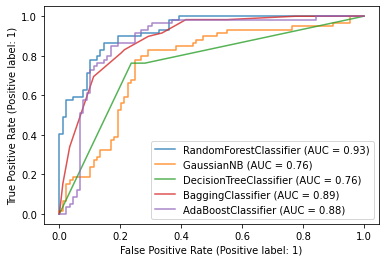

In [41]:
#Plot the resulst for the models with overfitting problems
ax = plt.gca()
rfc_disp = plot_roc_curve(rf, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(bys, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(dt, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(bg, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(adb, X_test, y_test, ax=ax, alpha=0.8)
plt.savefig("AUC2.jpg", dpi=2000)
plt.show()